In [29]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imghdr
import tensorflow as tf

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [9]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping


In [6]:
#os.listdir('data')# show all the sets in this folders

In [7]:
#setting GPU
gpus= tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

### Loading

In [13]:
#this step is to check which types are these images
#img_type= ['jpg','jpeg','bmp','png']
data_number= '/python/Project/CNN/data/number'

image_number=[]
label_number=[]

"""def load (image_path, size=(64,64)):
    im = load_img(image_path, target_size= size)
    im= img_to_array(im)
    return im
"""

# Here I split the data set into 2 seperate parts since the kernel from my jupyter is pretty weak and I constantly have the memory error
for folder_number in os.listdir(data_number):
    fold_n= os.path.join(data_number,folder_number)
    for i in os.listdir(fold_n):
        img= os.path.join(folder_number,fold_n,i)#.astype('float64')
        #img= cv2.resize(img,(64,64))
        image_number.append(load_img(img))
        label_number.append(folder_number)



In [15]:
image_number=np.array(image_number)
label_number=np.array(label_number)

In [16]:
print(str(image_number.shape))
print(label_number.shape) # quantities, height, width, channels/depth (RGB type)

(10800, 128, 128, 3)
(10800,)


In [17]:
la=LabelEncoder()
labe_numberl=la.fit_transform(label_number)

In [18]:
print('Numer of samples in number file:' , len(image_number))
print('Number of labels in number file :' , len (label_number))
print('Dimension of image:', image_number[0].shape)

Numer of samples in number file: 10800
Number of labels in number file : 10800
Dimension of image: (128, 128, 3)


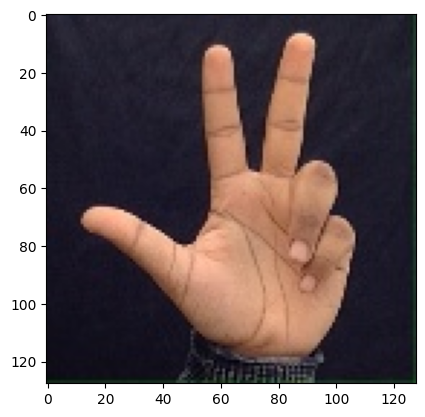

In [19]:
a= image_number[9000]
a.shape
plt.imshow(a)

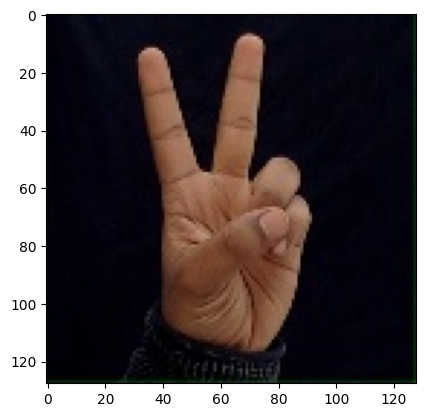

In [20]:
b= image_number[2000]
b.shape
plt.imshow(b)

### Process

In [21]:
#image= image.astype(np.uint8)
image_number= image_number.astype('float32')

In [22]:
print(str(image_number.shape))

(10800, 128, 128, 3)


In [24]:
image_number/=255 #Normalize image vectors
X_train_number,X_test_number,y_train_number,y_test_number= train_test_split(image_number, label_number, test_size=0.2, random_state=42,shuffle=True) 

In [25]:
type(X_train_number)

numpy.ndarray

In [26]:
print(X_train_number.dtype)

float32


### Model Building


In [27]:
model= Sequential() 
# Map plan for my model : 
# conv(stride/distance of the moving pixels during the kernel process = 2, kernel = 3x3, zero path=3, output size= 126, 32 layers, 'relu')
# ReLU
# max poolling(stride=2, kernel= 2x2, outputsize= (64-2)/2 +1 =32, 
# conv (S = 2, K= 3x3, 64 layers, relu)
# Max pooling( stride= 1, K=2x2, 64 layers)
#drop out =[0.1:0.25]
#Flatten to 1D
model.add(Conv2D(32, kernel_size=(3,3), activation= 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35,activation='softmax'))


model.summary()

C:\Users\famcha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 35)                  │           4,515 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,309,155 (12.62 MB)

 Trainable params: 3,309,155 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
callbacks = [
             EarlyStopping(patience=2)
]

### Number set

In [31]:
y_test_number

array(['2', '8', '3', ..., '7', '4', '7'], dtype='<U1')

In [32]:
y_test_number=np.float32(y_test_number)

In [33]:
y_train_number=np.float32(y_train_number)

In [81]:
score = model.evaluate(X_test_number,y_test_number, verbose=1)
print('\nKeras CNN binary accuracy:', score[1],'\n')

68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 1.0000 - loss: 5.7649e-04

Keras CNN binary accuracy: 1.0 



In [90]:
history= model.fit(X_train_number,y_train_number, 
                          epochs= 10,
                          batch_size=64,
                          validation_data=(X_test_number, y_test_number),
                          verbose=1)
                          

Epoch 1/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 93s 668ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 7.2850e-09
Epoch 2/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 85s 626ms/step - accuracy: 0.9996 - loss: 6.0308e-04 - val_accuracy: 1.0000 - val_loss: 3.9736e-09
Epoch 3/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 86s 636ms/step - accuracy: 0.9999 - loss: 4.0982e-04 - val_accuracy: 1.0000 - val_loss: 1.1590e-09
Epoch 4/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 85s 630ms/step - accuracy: 0.9989 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 1.1038e-10
Epoch 5/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 85s 632ms/step - accuracy: 1.0000 - loss: 8.9491e-05 - val_accuracy: 1.0000 - val_loss: 1.6557e-10
Epoch 6/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 85s 629ms/step - accuracy: 1.0000 - loss: 4.7949e-04 - val_accuracy: 1.0000 - val_loss: 4.6800e-08
Epoch 7/10
135/135 ━━━━━━━━━━━━━━━━━━━━ 87s 644ms/step - accuracy: 1.0000 - loss: 1.4523e-04 - val_accuracy: 1.0000 - val_loss: 5.5189e-11
Epoch 8/10
135/135 ━━━━━━━━━━━━━━━━

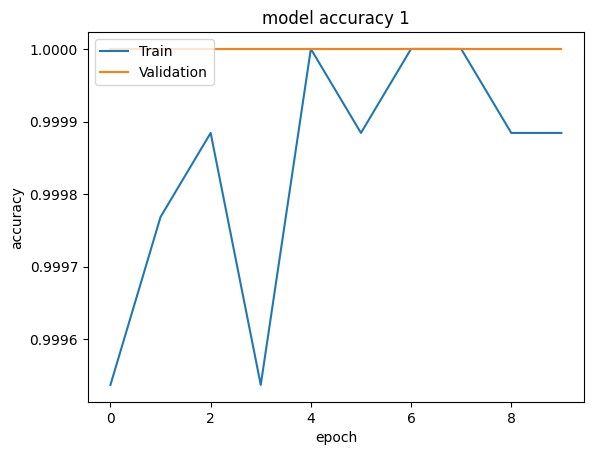

In [91]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy 1')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

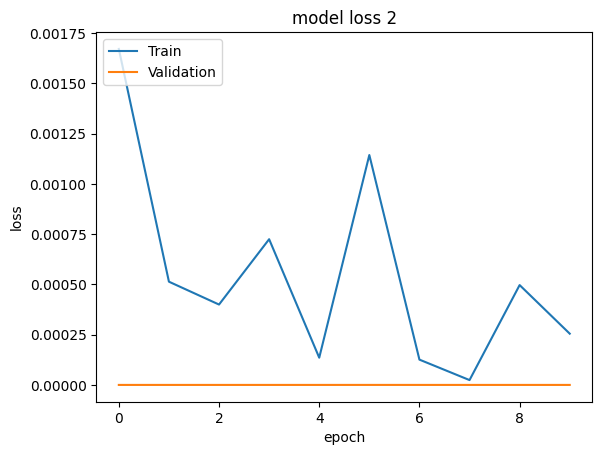

In [92]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss 2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [79]:
history= model.fit(X_train_number,y_train_number, 
                          epochs= 10,
                          batch_size=32,
                          validation_data=(X_test_number, y_test_number),
                          verbose= 1)
                          

Epoch 1/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 102s 374ms/step - accuracy: 1.0000 - loss: 2.9985e-04 - val_accuracy: 1.0000 - val_loss: 1.2202e-07
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 96s 357ms/step - accuracy: 0.9999 - loss: 4.7883e-04 - val_accuracy: 1.0000 - val_loss: 1.0558e-07
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 95s 350ms/step - accuracy: 0.9995 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 9.3822e-10
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 96s 355ms/step - accuracy: 0.9999 - loss: 3.6440e-04 - val_accuracy: 1.0000 - val_loss: 2.8974e-08
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 96s 355ms/step - accuracy: 0.9995 - loss: 8.4152e-04 - val_accuracy: 1.0000 - val_loss: 1.3963e-07
Epoch 6/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 95s 351ms/step - accuracy: 0.9981 - loss: 0.0081 - val_accuracy: 1.0000 - val_loss: 2.1818e-05
Epoch 7/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 97s 361ms/step - accuracy: 0.9995 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 1.2859e-08
Epoch 8/10
270/270 ━━━━━━━━━━━━━━━━━━━

In [80]:
history

In [103]:
y_pred_number= model.predict(X_test_number)
y_pred_classes= np.argmax(y_pred_number)
y_true_number= np.argmax(y_test_number)

68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step


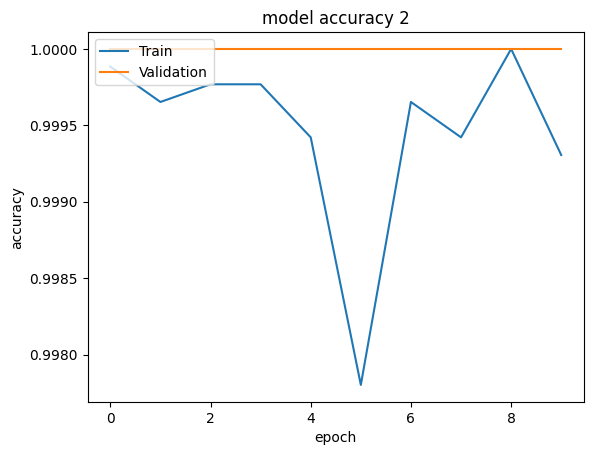

In [89]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy 2')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

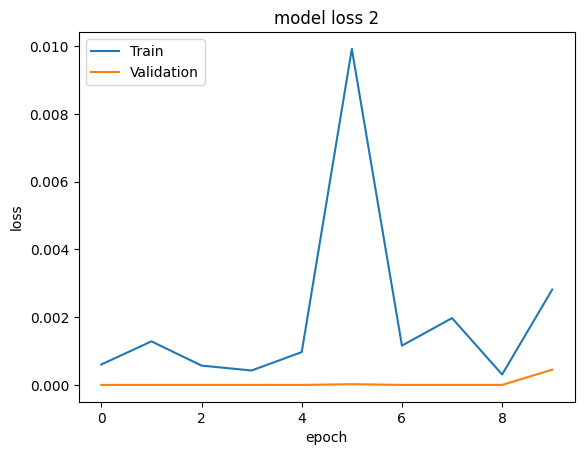

In [88]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss 2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [93]:
history= model.fit(X_train_number,y_train_number, 
                          epochs= 5,
                          batch_size=32,
                          validation_data=(X_test_number, y_test_number),
                          verbose= 1)
                          

Epoch 1/5
270/270 ━━━━━━━━━━━━━━━━━━━━ 63s 233ms/step - accuracy: 1.0000 - loss: 3.6983e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
270/270 ━━━━━━━━━━━━━━━━━━━━ 62s 228ms/step - accuracy: 1.0000 - loss: 2.3218e-05 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
270/270 ━━━━━━━━━━━━━━━━━━━━ 61s 226ms/step - accuracy: 0.9973 - loss: 0.0143 - val_accuracy: 1.0000 - val_loss: 6.2916e-09
Epoch 4/5
270/270 ━━━━━━━━━━━━━━━━━━━━ 62s 230ms/step - accuracy: 0.9994 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 5.5189e-11
Epoch 5/5
270/270 ━━━━━━━━━━━━━━━━━━━━ 62s 228ms/step - accuracy: 1.0000 - loss: 5.1951e-04 - val_accuracy: 1.0000 - val_loss: 1.1976e-08


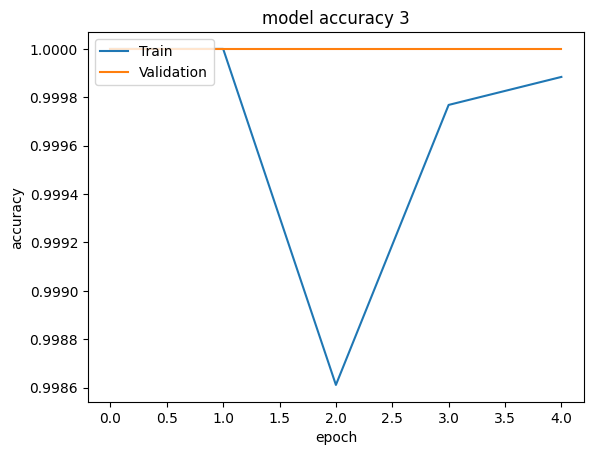

In [94]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy 3')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

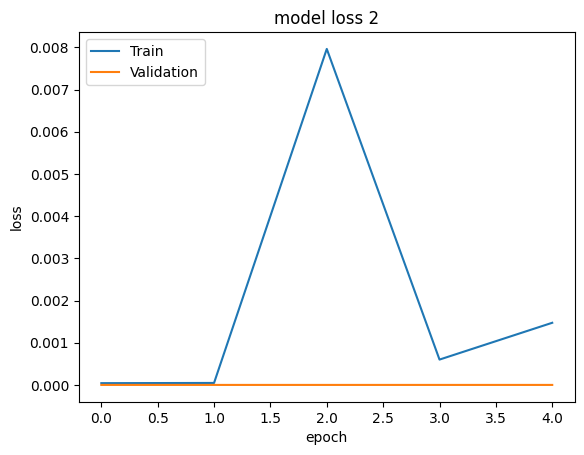

In [96]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss 2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Conclusion

Not bad for my first time building a CNN model. But I still need to go deeper into the math behind, so will improve and come back the next time ✌ ✌ ✌ 